This is the mini-independence project I had done around three weeks as a undergraduate short-time researcher at University. This idea comes from the research paper Application of Life Cycle Assessment and Machine Learning for
High-Throughput Screening of Green Chemical Substitutes(https://pubs.acs.org/doi/10.1021/acssuschemeng.0c02211).

I use the same approarch mentioend in the research paper,but this time I use the different machine learnign algorithm as well to compare the accuracy. 

Life cycle  assessment impact is the time-consuming proces, hence it is o,possible to get all of life cycle assesment impact values of millions compound avaliable in the chemical process. Application of black-box approachs like deep learnign or machine learning may give a light on estimating the life-cycle impact of unknown compound. 

The database used in this project mainly comes from the small molecule organic compound, the dataset contains wide varieties may improve the accuracy of estimation

## Data preparation


In [1]:
import pandas as pd
filename = "C:/Users/super/OneDrive - The University of Tokyo/Chem sys engineering/短期研究/project/Chemoinformatic and machine learning project/smile and calculation.csv"
dataframe = pd.read_csv(filename)


In [2]:
dataframe.columns

Index(['compound name', 'smile formula', 'EI99', 'Recipe'], dtype='object')

We can extracts the chemical properties from SMILES structure. Hence, firstly we have to obtain smile structure from the name of the molecule.

In [3]:
# obtain SMILES structure from the code below.
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = dataframe['compound name']
smilename = []
for ids in identifiers :
    name = CIRconvert(ids)
    print(name)
    smilename.append(name)

CC(F)F
CCCO
Oc1ccc(Cl)cc1Cl
Cc1ccc(Cl)cc1Cl
Cc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O
CC(C)(C)c1ccc(O)c(c1)C(C)(C)C
Did not work
CC(C)(C)c1cccc(c1O)C(C)(C)C
CCC(C)O
CCC(C)(C)O
Nc1ccccc1[N+]([O-])=O
Oc1ccccn1
CC(C)CCOC(C)=O
CC(C)CC(C)=O
CC(C)(C)c1ccc(C=O)cc1
Cc1ccc(cc1)C(C)(C)C
CC=O
CC(=O)Nc1ccccc1
CC(O)=O
CC(=O)OC(C)=O
CC(=O)CC(O)=O
CC(C)(O)C#N
CC(C)=O
CC(Cl)=O
C#C
Nc1c(Cl)c(Oc2ccccc2)ccc1[N+]([O-])=O
C=CC=O
OC(=O)C=C
OC(=O)CCCCC(O)=O
O[S](=O)(=O)c1ccccc1
Did not work
ClCC=C
Oc1cccc2ccccc12
Cc1ccccn1
Nc1ccccc1
Nc1ccccc1C(O)=O
O=C1c2ccccc2C(=O)c3ccccc13
OCC(O)C1OC(=C(O)C1=O)O
CCNc1nc(Cl)nc(NC(C)C)n1
NC(=O)N=NC(N)=O
ClC(Cl)c1ccccc1
O=Cc1ccccc1
c1ccccc1
OCc1ccccc1
ClCc1ccccc1
CC(C)(c1ccc(O)cc1)c2ccc(O)cc2
O=BOB=O
B12B3B4B1C234
FB(F)F
C=CC=C
CCCC
OCCCCO
CCCCOC(C)=O
CCCCOC(=O)C=C
CCCCOCCOCCOC(C)=O
ClC(Cl)(Cl)SN1C(=O)C2CC=CCC2C1=O
S=C=S
ClC(Cl)(Cl)Cl
[Cl]
OC(=O)CCl
ClCC(Cl)=O
FC(F)Cl
COCCl
[O-][N+](=O)c1ccccc1Cl
CC(Cl)C(O)=O
O[S](Cl)(=O)=O
Clc1c(Cl)c(C#N)c(Cl)c(C#N)c1Cl
CN(C)C(=O)Nc1ccc(C)c(Cl)c1


In [4]:
dataframe['smile formula'] = smilename

In [5]:
dataframe

,compound name,smile formula,EI99,Recipe
0,"1,1-difluoroethane",CC(F)F,0.030917,0.10571136
1,1-propanol,CCCO,0.020516,0.092209619
2,"2,4-dichlorophenol",Oc1ccc(Cl)cc1Cl,0.021370,0.021370055
3,"2,4-dichlorotoluene",Cc1ccc(Cl)cc1Cl,0.015239,0.058422759
4,"2,4-dinitrotoluene",Cc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O,0.023304,0.042908317
...,...,...,...,...
216,methylcyclopentane,CC1CCCC1,0.008518,0.026183073
217,napropamide,CCN(CC)C(=O)C(C)Oc1cccc2ccccc12,0.085851,0.24888582
218,propane,CCC,0.005011,0.019749252
219,pyridine,c1ccncc1,0.033785,0.15302354


In [6]:
dataframe.head()

,compound name,smile formula,EI99,Recipe
0,"1,1-difluoroethane",CC(F)F,0.030917,0.10571136
1,1-propanol,CCCO,0.020516,0.092209619
2,"2,4-dichlorophenol",Oc1ccc(Cl)cc1Cl,0.021370,0.021370055
3,"2,4-dichlorotoluene",Cc1ccc(Cl)cc1Cl,0.015239,0.058422759
4,"2,4-dinitrotoluene",Cc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O,0.023304,0.042908317


## Data cleaning before reduce the dimensions with PCA

In [7]:
# we will use the preprocessed data
filename = "C:/Users/super/OneDrive - The University of Tokyo/Chem sys engineering/短期研究/project/Chemoinformatic and machine learning project/datawithsmileformular_finalversion.csv"
dataframe = pd.read_csv(filename)

In [8]:
dataframe = dataframe.drop('Unnamed: 200',axis=1)

In [9]:
#drop column if there have only one value
for column in dataframe.columns:
    num = dataframe[column].nunique()
    if num <=2:
        dataframe = dataframe.drop(column,axis=1)
dataframe

,compound name,smile formula,EI99,Recipe,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_unbrch_alkane,fr_urea
0,"1,1-difluoroethane",CC(F)F,0.030917,0.10571136,2.323790,8.754888,3.577350,2.333279,2.333279,1.732051,...,0,0,0,0,0,0,0,0,0,0
1,1-propanol,CCCO,0.020516,0.092209619,1.974745,5.245112,3.414214,2.861427,2.861427,1.914214,...,0,0,0,0,0,0,0,0,0,0
2,"2,4-dichlorophenol",Oc1ccc(Cl)cc1Cl,0.021370,0.021370055,3.171678,222.297887,6.853371,4.435193,5.947051,4.198377,...,0,0,0,0,0,1,1,0,0,0
3,"2,4-dichlorotoluene",Cc1ccc(Cl)cc1Cl,0.015239,0.058422759,3.171678,218.156178,6.853371,4.987980,6.499838,4.198377,...,0,0,0,0,0,0,0,0,0,0
4,"2,4-dinitrotoluene",Cc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O,0.023304,0.042908317,3.267052,374.755334,10.008072,6.759471,6.759471,6.019745,...,0,0,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,methylcyclopentane,CC1CCCC1,0.008518,0.026183073,2.184106,33.302969,4.405777,4.405777,4.405777,2.893847,...,0,0,0,0,0,0,0,0,0,0
214,napropamide,CCN(CC)C(=O)C(C)Oc1cccc2ccccc12,0.085851,0.24888582,2.215870,585.064627,14.535169,12.296726,12.296726,9.668234,...,0,0,0,0,0,0,0,0,0,0
215,propane,CCC,0.005011,0.019749252,1.632993,0.000000,2.707107,2.707107,2.707107,1.414214,...,0,0,0,0,0,0,0,0,0,0
216,pyridine,c1ccncc1,0.033785,0.15302354,3.000000,75.861140,4.242641,3.333965,3.333965,3.000000,...,0,0,0,0,0,0,0,0,0,0


## PCA

This time we will use Sci-kit learn library to perform PCA.

In [10]:
y = dataframe.pop('EI99')
y

0      0.030917
1      0.020516
2      0.021370
3      0.015239
4      0.023304
         ...   
213    0.008518
214    0.085851
215    0.005011
216    0.033785
217    0.010918
Name: EI99, Length: 218, dtype: float64

In [11]:
dataframe = dataframe.drop('Recipe',axis=1)


In [12]:
dataframe = dataframe.drop(['compound name', 'smile formula'],axis=1)

In [13]:
dataframe.isnull().sum().sum()
# so drop column that has Nan value =

4

In [14]:
for column in dataframe.columns:
    if dataframe[column].isnull().values.any():
        dataframe = dataframe.drop(column,axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(dataframe), columns=dataframe.columns)
df_scaled

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_unbrch_alkane,fr_urea
0,-0.555625,-0.734781,-0.701509,-0.807359,-0.855336,-0.822196,-0.819372,-0.923896,-0.788685,-0.735025,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
1,-1.032909,-0.760576,-0.754457,-0.583931,-0.664113,-0.730526,-0.457993,-0.611259,-0.619166,-0.625384,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
2,0.603776,0.834646,0.361749,0.081835,0.453083,0.418939,0.120920,0.353375,0.103098,0.293647,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,2.924120,2.924120,-0.091245,-0.192726,-0.111283
3,0.603776,0.804207,0.361749,0.315686,0.653227,0.418939,0.316942,0.522958,0.349702,0.453146,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
4,0.734191,1.955127,1.385632,1.065097,0.747231,1.335510,0.883993,0.549720,0.839564,0.318094,...,-0.206419,-0.160044,8.492866,8.870842,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.746630,-0.554365,-0.432637,0.069391,-0.104958,-0.237543,0.513997,0.229629,0.760573,0.267004,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
214,-0.703196,3.500788,2.854937,3.407578,2.752075,3.171548,3.498215,2.811336,2.713603,1.530184,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
215,-1.500220,-0.799124,-0.983954,-0.649215,-0.719987,-0.982142,-0.535383,-0.678211,-0.632831,-0.634222,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283
216,0.369024,-0.241585,-0.485584,-0.384029,-0.493023,-0.184123,-0.226507,-0.410996,-0.369924,-0.464179,...,-0.206419,-0.160044,-0.199363,-0.186973,-0.237461,-0.247314,-0.247314,-0.091245,-0.192726,-0.111283


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-4.507220,0.293604,1.660033,1.712959,-0.887040,1.735924,2.279111,0.126326,0.587867,-0.679111,...,6.413335e-05,-1.933687e-12,2.013115e-11,-7.646433e-11,2.853273e-16,5.394600e-17,-3.433882e-16,6.213109e-16,-1.324172e-16,-4.101154e-16
1,-3.891970,0.499529,-0.656551,-1.557828,-0.640075,-1.021245,0.255422,0.404433,0.215215,-0.754889,...,1.393831e-05,1.597308e-11,1.204513e-11,3.172726e-11,2.875337e-15,-1.137178e-15,-1.134669e-17,5.613687e-16,-1.208954e-15,3.100543e-15
2,3.219136,-4.216616,-0.376475,2.454960,-1.658396,-1.930267,-3.031942,2.760458,1.602254,-0.069775,...,1.818623e-05,-3.875698e-11,1.275696e-10,-4.622209e-11,3.556349e-16,9.312702e-16,-1.994476e-16,-5.166497e-16,4.896009e-16,1.850384e-15
3,1.909202,-5.308510,1.746901,0.999269,0.608524,-0.867647,-1.793690,-1.111402,-1.234888,0.909401,...,1.850383e-05,-6.864078e-11,5.342276e-11,-6.367738e-11,-5.006045e-17,-1.087824e-15,1.395233e-15,-2.448906e-16,-4.403265e-16,-1.319953e-15
4,7.818939,0.285073,-3.892816,6.910095,2.146838,2.606108,-1.751369,-2.656589,-9.644395,-4.315176,...,1.138635e-05,-1.788275e-10,-5.708922e-11,8.853952e-12,3.703336e-16,5.681975e-16,-9.900119e-17,3.121763e-16,6.741919e-16,3.082269e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-2.102290,-3.457369,-0.016862,-3.731406,1.200386,1.006307,1.799387,1.201134,-2.258857,1.531626,...,1.809586e-07,-8.186467e-11,-1.225981e-12,4.084388e-11,3.694137e-16,-8.357849e-17,2.706759e-16,3.492004e-16,-6.775106e-16,2.865103e-16
214,15.836182,-4.583228,-2.258346,-2.248047,0.218103,2.083560,1.632324,-2.262875,1.573878,0.584990,...,-3.317327e-05,-2.953170e-11,-3.723016e-11,-7.198943e-11,-2.451978e-16,4.535114e-18,-1.583735e-16,6.198493e-16,-4.565002e-16,6.854914e-17
215,-5.708075,-1.885970,-0.132876,-1.560289,-0.516452,-0.722038,0.874706,-0.220663,-1.143600,1.107809,...,-4.306893e-06,-3.114426e-11,2.330739e-11,-2.514283e-11,-1.975562e-16,-2.175948e-17,9.681819e-17,-1.522192e-16,4.238171e-17,-5.565386e-16
216,-2.202079,-2.012760,-1.779180,1.049007,1.355608,-0.266123,0.152331,-1.045499,-0.808943,2.001018,...,-2.126265e-05,-5.810685e-11,-2.288201e-11,1.189354e-10,2.816362e-17,-1.124754e-16,-6.621950e-17,-8.165118e-17,7.143099e-16,1.129783e-17


Text(0, 0.5, 'Explained Varience')

<Figure size 6400x4800 with 0 Axes>

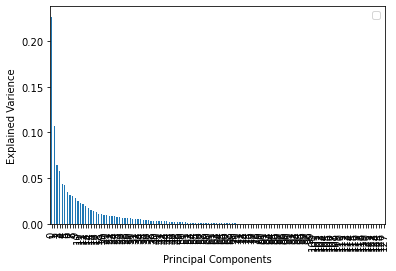

In [17]:
#visualization of explained variabel (Dimension reduction of PCA)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=800)
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

In [18]:
pca_data=pd.DataFrame(pca.explained_variance_ratio_)

In [19]:
pca_data
#save pca_data
pca_data.to_csv('pca_dataforvisualization.csv')

In [20]:
df = pd.read_csv('pca_dataforvisualization.csv')

In [21]:
df

,Unnamed: 0,0
0,0,2.269438e-01
1,1,1.072575e-01
2,2,6.383389e-02
3,3,5.789110e-02
4,4,4.297112e-02
...,...,...
123,123,1.202590e-33
124,124,1.202590e-33
125,125,1.202590e-33
126,126,1.202590e-33


In [22]:
df = df.drop('Unnamed: 0',axis=1)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# calculate cumulative sum of explained variances
tot = sum(df['0'])
var_exp = [(i / tot) for i in sorted(df['0'], reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp

[0.22694380998311217,
 0.10725747477074946,
 0.06383388798182908,
 0.05789109881178225,
 0.04297112288717079,
 0.04235976112575768,
 0.03501541240626965,
 0.03185398155544284,
 0.030400583644367433,
 0.02778660128946582,
 0.024830336494259708,
 0.022754686948730396,
 0.022034029577960794,
 0.018840084388452683,
 0.01686404122005507,
 0.015254882036913966,
 0.014331796368835862,
 0.012341772313454454,
 0.011087908261174648,
 0.010495392478089545,
 0.009961126933987043,
 0.00936943539179904,
 0.008804043717977838,
 0.008489948958058836,
 0.007988137708609535,
 0.0072866485446000315,
 0.006889655875670429,
 0.0067065201363961284,
 0.006626531642377029,
 0.006049394127470826,
 0.005971261259559526,
 0.005563851533048924,
 0.005377810760111923,
 0.004879090584374821,
 0.00462623700494572,
 0.004220965819795418,
 0.0040414819979838175,
 0.0037945375331910167,
 0.0034602825660690153,
 0.0033589880102050146,
 0.0032849438632787144,
 0.003013353119283513,
 0.0028657237598793124,
 0.002761153690

In [24]:
#visualization of cumulative explained variable 
#use 90% of explained varience ratio
i=1
for cum in cum_var_exp:
    if cum <=0.9:
        i=i+1
print(i)

28


In [25]:
#plot the graph to visualize more about explanied variance ratio

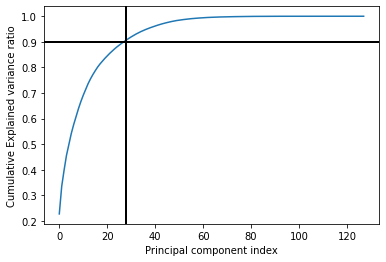

In [26]:
plt.plot(cum_var_exp)
plt.ylabel('Cumulative Explained variance ratio')
plt.xlabel('Principal component index')
plt.axhline(y=0.9, linewidth=2, color = 'k')
plt.axvline(x=28, linewidth=2, color='k')
plt.savefig('my_plot.png')
plt.show()

In [27]:
#hence based on the PCA result, we can reduce the dimension from 192 to new 26 principal components.

## Prediction of life cycle by machine learning and deep learning model from principal components

This time we will use three model: the first model is ANN(deep learning based model), the second model is Xgboost, and the last model is random forest model.

First,we will import the useful library for machine learning implementation.

In [28]:
!pip install xgboost

In [29]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

<b> ANN(deep learning based model implementation </b>

In [33]:
#create test and train data with shuffle in dataset
#first import principal component performed dataset => we focus on 28 components totally
#data is cleaned enough and shuffle random size 
filename = "C:/Users/super/OneDrive - The University of Tokyo/Chem sys engineering/短期研究/pca_calculatedforann.csv"
df = pd.read_csv(filename)
df

,Unnamed: 0,compound name,smile formula,EI99,Recipe,0,1,2,3,4,...,118,119,120,121,122,123,124,125,126,127
0,0,"1,1-difluoroethane",CC(F)F,0.030917,0.10571136,-4.507220,0.293604,1.660033,1.712959,-0.887040,...,6.410000e-05,-1.930000e-12,2.010000e-11,-7.650000e-11,2.850000e-16,5.390000e-17,-3.430000e-16,6.210000e-16,-1.320000e-16,-4.100000e-16
1,1,1-propanol,CCCO,0.020516,0.092209619,-3.891970,0.499529,-0.656551,-1.557828,-0.640075,...,1.390000e-05,1.600000e-11,1.200000e-11,3.170000e-11,2.880000e-15,-1.140000e-15,-1.130000e-17,5.610000e-16,-1.210000e-15,3.100000e-15
2,2,"2,4-dichlorophenol",Oc1ccc(Cl)cc1Cl,0.021370,0.021370055,3.219136,-4.216616,-0.376475,2.454960,-1.658396,...,1.820000e-05,-3.880000e-11,1.280000e-10,-4.620000e-11,3.560000e-16,9.310000e-16,-1.990000e-16,-5.170000e-16,4.900000e-16,1.850000e-15
3,3,"2,4-dichlorotoluene",Cc1ccc(Cl)cc1Cl,0.015239,0.058422759,1.909202,-5.308510,1.746901,0.999269,0.608524,...,1.850000e-05,-6.860000e-11,5.340000e-11,-6.370000e-11,-5.010000e-17,-1.090000e-15,1.400000e-15,-2.450000e-16,-4.400000e-16,-1.320000e-15
4,4,"2,4-dinitrotoluene",Cc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O,0.023304,0.042908317,7.818939,0.285073,-3.892816,6.910095,2.146838,...,1.140000e-05,-1.790000e-10,-5.710000e-11,8.850000e-12,3.700000e-16,5.680000e-16,-9.900000e-17,3.120000e-16,6.740000e-16,3.080000e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,methylcyclopentane,CC1CCCC1,0.008518,0.026183073,-2.102290,-3.457369,-0.016862,-3.731406,1.200386,...,1.810000e-07,-8.190000e-11,-1.230000e-12,4.080000e-11,3.690000e-16,-8.360000e-17,2.710000e-16,3.490000e-16,-6.780000e-16,2.870000e-16
214,214,napropamide,CCN(CC)C(=O)C(C)Oc1cccc2ccccc12,0.085851,0.24888582,15.836182,-4.583228,-2.258346,-2.248047,0.218103,...,-3.320000e-05,-2.950000e-11,-3.720000e-11,-7.200000e-11,-2.450000e-16,4.540000e-18,-1.580000e-16,6.200000e-16,-4.570000e-16,6.850000e-17
215,215,propane,CCC,0.005011,0.019749252,-5.708075,-1.885970,-0.132876,-1.560289,-0.516452,...,-4.310000e-06,-3.110000e-11,2.330000e-11,-2.510000e-11,-1.980000e-16,-2.180000e-17,9.680000e-17,-1.520000e-16,4.240000e-17,-5.570000e-16
216,216,pyridine,c1ccncc1,0.033785,0.15302354,-2.202079,-2.012760,-1.779180,1.049007,1.355608,...,-2.130000e-05,-5.810000e-11,-2.290000e-11,1.190000e-10,2.820000e-17,-1.120000e-16,-6.620000e-17,-8.170000e-17,7.140000e-16,1.130000e-17


In [34]:
df = df.drop('Unnamed: 0',axis=1)
# Focus only 28 components
df = df.iloc[:,0:32]  #Based on the PCA plot, we need only 28 compon

In [35]:
#split the dataset
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)


In [36]:
#save file to csv
train.to_csv('traincompoundinformation.csv')
test.to_csv('testcompoundinformation.csv')

In [37]:
#define train and target for feeding
target1 = train.iloc[:,2] #EI99
target2 = train.iloc[:,3] #Recipe
train = train.iloc[:,4:]

In [38]:
train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
29,-4.408053,-1.668480,1.401963,0.157614,0.096663,-0.594523,-1.254437,-0.727902,0.113127,0.626012,...,-1.132121,2.240267,-1.964342,-0.683645,0.849085,-0.638488,1.071691,1.977596,-0.717206,0.369807
80,-5.376175,0.281105,-0.631818,-1.290725,-0.208005,-0.141550,-0.485798,-0.578734,-0.077905,-0.763541,...,0.722012,-0.284481,-0.433303,1.013078,-2.064037,0.564818,-0.562826,0.011274,0.867893,-0.595339
143,0.836395,3.703619,0.062408,-2.998974,-1.456324,1.489015,-0.961838,-2.660285,0.479923,-4.291245,...,0.880474,0.825834,-0.836117,1.076933,-2.961566,0.045165,-0.082931,0.481227,0.572224,-0.786174
113,-4.544332,1.818373,-0.995403,1.233136,-0.509725,0.299008,-1.754684,-0.428882,0.548056,0.740752,...,0.186779,-0.269558,0.004013,-1.155824,-0.286740,-0.699847,0.430954,-1.104158,0.575732,0.574094
131,-1.371721,4.335917,-0.406249,0.353864,-1.535459,-0.202903,-0.663778,1.064512,0.973962,1.245261,...,0.392516,-1.071997,-0.472676,-1.041211,0.689154,0.105679,0.586815,0.396828,1.424368,-0.264227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3.219136,-4.216616,-0.376475,2.454960,-1.658396,-1.930267,-3.031942,2.760458,1.602254,-0.069775,...,0.932453,-0.583230,0.754109,1.172623,-0.295440,-1.409096,0.187082,-1.474840,0.280572,1.264004
93,25.487777,22.365856,2.137105,-3.274616,-0.047625,-1.547161,-3.007527,-0.245753,-5.060154,9.978234,...,-0.864753,1.262934,0.346900,1.112975,-1.196916,0.696809,-0.935558,0.226426,-1.369125,1.224652
187,-2.819160,-2.396333,3.601492,1.149529,0.203159,-1.714615,-2.346006,-0.449931,0.245909,0.354190,...,0.099834,-0.295863,1.041852,-0.012934,0.018742,0.433831,-0.693033,-0.665857,0.024096,0.763373
117,3.996038,8.071201,1.061887,1.067545,0.304555,-1.367841,0.147970,1.119814,0.641295,2.106699,...,2.033192,-0.593632,0.675412,-0.273198,0.127303,-1.752204,0.711205,0.112834,-0.358392,-2.356633


In [39]:
# Deep neural network architecture for ANN
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(174, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 174)               5046      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               89600     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 357,815
Trainable params: 357,815
Non-trainable params: 0
_________________________________________________________________


In [40]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [42]:
NN_model.fit(train, target1, epochs=10, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0630 - val_mean_absolute_error: 0.0630

Epoch 00001: val_loss did not improve from 0.04985
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471

Epoch 00002: val_loss improved from 0.04985 to 0.04710, saving model to Weights-002--0.04710.hdf5
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442

Epoch 00003: val_loss improved from 0.04710 to 0.04423, saving model to Weights-003--0.04423.hdf5
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0475 - val_mean_absolute_error: 0.0475

Epoch 00004: val_loss did not improve from 0.04423
Epoch 5/10
5/5 [==============================] - 0s 8ms/

In [43]:
# Load wights file of the best model :
wights_file = 'Weights-007--0.03383.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [44]:
#upload train file
filename = "C:/Users/super/OneDrive - The University of Tokyo/Chem sys engineering/短期研究/testcompoundinformation.csv"
test = pd.read_csv(filename)

In [45]:
test = test.drop('Unnamed: 0',axis=1)
target = test.iloc[:,2]
test = test.iloc[:,4:]

In [46]:
predictions = NN_model.predict(test)

In [47]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(predictions,target)
# The mean absolute error is only 2.04%

2.0441863333378816

Let's compare the result to other use cases

In [48]:
model = RandomForestRegressor()
model.fit(train,target1)

# Get the mean absolute error on the validation data
predicted_EI = model.predict(test)
MAE = mean_absolute_percentage_error(target , predicted_EI)
print('Random forest validation mean_absolute_percentage_error = ', MAE)

Random forest validation mean_absolute_percentage_error =  1.3555887111410896


In [49]:
XGBModel = XGBRegressor()
model.fit(train,target1)

# Get the mean absolute error on the validation data
predicted_EI = model.predict(test)
MAE = mean_absolute_percentage_error(target , predicted_EI)
print('XGboost mean_absolute_percentage_error = ', MAE)

XGboost mean_absolute_percentage_error =  1.2711013763028063


We see that the XGboost is the best model for prediction of life cycle imapct 